![machine learnia](logo_machine_learnia.jpg)    
# Régression linéaire polynômiales
### Machine learnia

### Pour faire simple, on récupère le fichier sur la [régression linéaire simple](ml_regression_lineaire_simple.ipynb) et on va changer le contenu de la matrice x et de la matrice theta

In [50]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

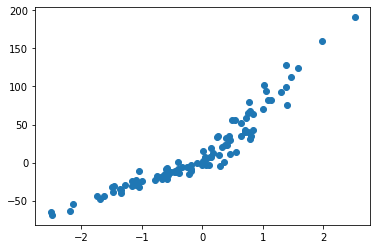

In [51]:
# Création dataset
x,y = make_regression(n_samples= 100, n_features= 1, noise= 10) # en linéaire
y = y + abs(y/2) # en polynômiale
# afficher le dataset en nuage de points
plt.scatter(x, y)

#### ! lorsqu'on utilise make.regression() les données de "y" sont incomplètes : donc réecrire les dimensions de "y"

In [52]:
# vérifier les dimensions de la matrice 
print(x.shape)
# réecrire les dimensions en prenant le nombre de lignes qu'il y a dans "y" en appelant shape[0]
y = y.reshape(y.shape[0], 1) 
print(y.shape)

(100, 1)
(100, 1)


In [53]:
# matrice x, avec hstack qui permet de coller tous les vecteurs
# on colle les vecteur en rajoutant une colonne de biais "1" de la meme taille que x
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X)) # on rajoute une colonne x**2
X.shape
print(X[:10]) # X = 100 lignes et 2 colonnes

[[ 1.04510664e+00  1.02230457e+00  1.00000000e+00]
 [ 5.55857517e-01  7.45558527e-01  1.00000000e+00]
 [ 1.78941827e+00 -1.33769140e+00  1.00000000e+00]
 [ 1.85860784e+00 -1.36330768e+00  1.00000000e+00]
 [ 1.60064105e-02  1.26516444e-01  1.00000000e+00]
 [ 1.99257852e-01  4.46383077e-01  1.00000000e+00]
 [ 1.63355891e-05  4.04173095e-03  1.00000000e+00]
 [ 1.29890574e-02  1.13969546e-01  1.00000000e+00]
 [ 6.03370994e-02  2.45636112e-01  1.00000000e+00]
 [ 6.15095210e+00 -2.48011131e+00  1.00000000e+00]]


In [54]:
# Générer theta avec des valeurs aléatoires
theta = np.random.randn(3, 1)# on change les dimensions pour passer de 2 à 3 lignes
theta.shape # on verifie les dimensions

(3, 1)

## Modèle linéaire

In [55]:
def model(X, theta):
    return X.dot(theta) # retourne le produit matriciel de X theta

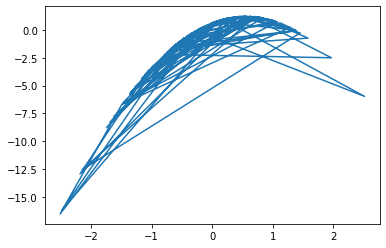

In [56]:
# afficher avec matplotlib le resultat du modèle par rapport au dataset X
plt.plot(x, model(X, theta))

## Fonction coût : erreur quadratique moyenne

In [57]:
def cost_fonction(X, y, theta):
    m = len(y)        # m représente le nombre d'exemple que l'on à dans le dataset, m = à la longueur du vecteur y
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) 
    # ² = à la différence entre notre model et notre y

## Gradients et Descente de gradient

In [58]:
# fonction gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [59]:
# fonction descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations) # sert pour la courbe d'apprentissage)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_fonction(X, y, theta) # on enregistre le coût du modèle pour chaque itérations
    return theta, cost_history

## Machine Learning : Entraînement du modèle

In [60]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)
theta_final

array([[10.53144206],
       [50.3051792 ],
       [ 8.50948328]])

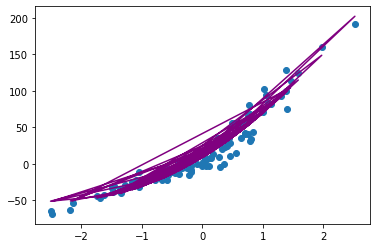

In [61]:
# vérification si le vecteur paramètre donne de bons résultats
predictions = model(X ,theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c="purple")

## Courbe d'apprentissage
###### Voir si la machine apprend correctement

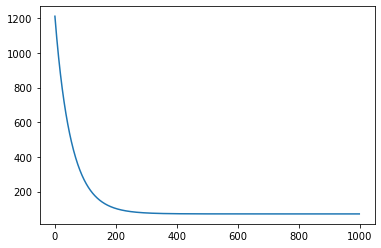

In [62]:
plt.plot(range(1000), cost_history)

## Coefficient de détermination
###### permet d'évaluer la performance de regression linéaire : méthode des moindres carrés
###### donc plus il est proche de 1 plus le modèle est bon

In [63]:
def coef_determination(y, pred):
    u =((y - pred)**2).sum()    # u = residu de la somme des carrées
    v = ((y - y.mean())**2).sum()
    return 1 - u/v       # v = somme total des carrées

In [64]:
coef_determination(y , predictions)

0.9414414575651073